### Introduction

This exercise is focused on the 1D Ising model. The problem is tackled through two different Monte Carlo methods (Metropolis and Gibbs), and then results are compared to the exact analytic solution. 

The algorithm is performed over a 1D lattice of $N$ spins with nearest neighbors interaction. The system has periodic boundary conditions ($s_{N+1} = s_{1}$): in this way  local geometry is the same everywhere in the lattice (the system is translationally invariant), and every spin has the same number of neighbour spins. Moreover, periodic boundary conditions allow us to simulate an infinite lattice. Assuming units such that $\mu_B=1$ and $k_B=1$, the energy for this system is:

$$
H = 
-J\sum_{i=1}^N s_i s_{i+1}
-\frac{h}{2}\sum_{i=1}^N (s_i + s_{i+1}) 
$$

where  $J>0$, and $\{ s_i \}_{i=1,N}$ are spin variables taking discrete values, either -1 or 1.

In the initial state of the system spins are oriented randomly. This corresponds to an initial state with T=$\infty$ (energy available to flip the spins >> energy due to the spin-spin interaction).

#### Metropolis sampling algorithm

- At each step of the MC simulation (cycling over all spins and trying to flip them all): 

1) pick one spin at random $s_k^\mu$ 

2) evaluate the energy difference between the new system state $E_\nu$ (with the flipped spin $s_k^\nu$) and the old one $E_\mu$ $$E_\nu - E_\mu = 2 \ J \ s_k^\mu \sum_{i \ n.n. \ to \ k} s_i^\mu,$$ or sum all over the spins in both states to evaluate the difference

3) evaluate the acceptance: $A(\nu|\mu) = min \big[ 1; e^{-\beta(E_\nu - E_\mu)} \big]$; then sample a random number *r* from a uniform distribution between $[ 0; 1)$ -> if $r \leq A$, then flip the spin

#### Gibbs sampling algorithm

- At each step of the MC simulation (cycling over all spins and trying to flip them all) as before: 

1) pick one spin at random $s_k^\mu$ 

2) change the value of this spin sampling from the probability distribution 
$$ p = \frac{1}{1 + e^{\mp 2 \ \beta \ J \ \sum_{i \ n.n. \ to \ k} s_i}} $$

$\rightarrow$ for example, in this way the probability for $s_k^\mu$ to be 1 is $ p = \frac{1}{1 + e^{ - 2 \ \beta \ J \ \sum_{i \ n.n. \ to \ k} s_i}} $: $\rightarrow$ sample a number r from a uniform distribution in $[0; 1)$ and set the spin value to 1 if $r \leq p$, set it to -1 otherwise.

The quantities considered in this exercise are $U(N,T)$ $C(N,T)$, $\chi(N,T)$, $M(N,T,h)$, which can be calculated using a Monte Carlo code as the following expressions:
1. $U(N,T) = \langle H \rangle_{h=0}$
2. $C(N,T) = k_B \beta^2 (\langle H^2 \rangle_{h=0}-\langle H \rangle_{h=0}^2)$ 
3. $\chi(N,T) = \beta \langle (\sum_{i=1,N}s_i)^2 \rangle_{h=0}$
4. $M(N,T,h=0.02)= \langle \sum_{i=1,N}s_i \rangle_{h=0.02}$

In the code all this were calculated per spin (i.e. all the quantities are divided for the number of spins - 50). The code was run with these values in the input file:

- T = 0.5
- nspin = 50
- J = 1.0
- h = 0.0 (for $U$, $C$ and $\chi$), or h = 0.02 for $M$

### Equilibration

Firstly, the given code was upgraded adding: 1)the possiblity to restart from a previous configuration, 2) the Gibbs algorithm part, 3) the measurements of all the quantities $U(N,T)$ $C(N,T)$, $\chi(N,T)$, $M(N,T,h)$.

Secondly, an *Equilibration ( )* function was added to the code. This function runs the code for $N_{equi}$ steps before starting measurements, provided that the *equi* option in the input file is on. Values during equilibration are saved in a different file (with <font face="Courier">equi</font></span>  tag). In order to get the best $N_{equi}$ value, the simulation was firstly run with 100 blocks of $10^4$ steps each: the observables' trends gave a rough estimation of the minimum number of steps in the equilibration phase. As an example, the magnetization (which appeared to be the most unstable quantity) graphs at $T=0.5$ and $T=2.0$ are reported. 

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

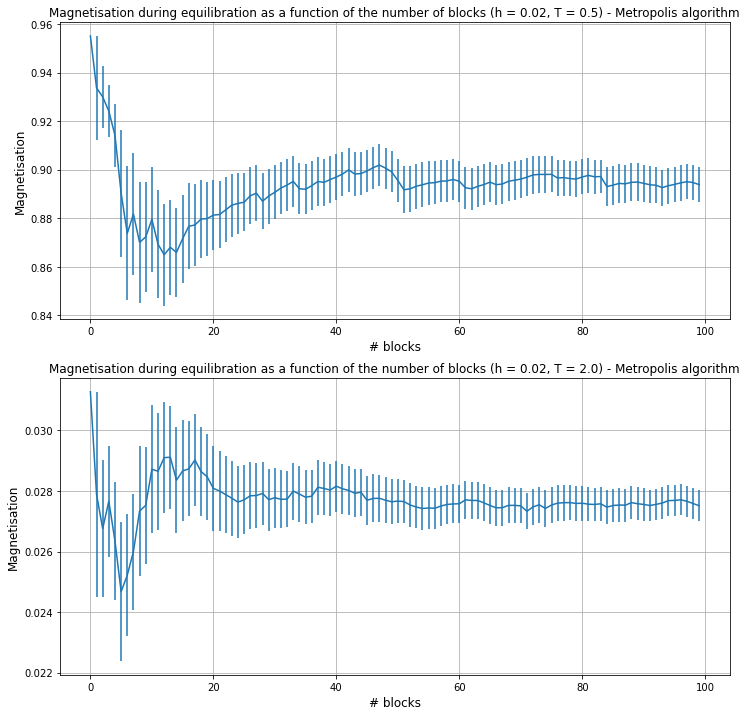

In [4]:
M=100
step = np.arange(M)
## questo sempre lo stesso

mag = np.loadtxt( './Outfiles/equi_metro_prova3_output.mag.1',max_rows=M, usecols=2)
err_mag = np.loadtxt('./Outfiles/equi_metro_prova3_output.mag.1',max_rows=M, usecols=3)
mag2 = np.loadtxt( './Outfiles/equi_metro_prova8_output.mag.1',max_rows=M, usecols=2)
err_mag2 = np.loadtxt('./Outfiles/equi_metro_prova8_output.mag.1',max_rows=M, usecols=3)

plt.figure(figsize=(12,12))

plt.subplot(211)
plt.errorbar(step,mag, err_mag)
plt.title("Magnetisation during equilibration as a function of the number of blocks (h = 0.02, T = 0.5) - Metropolis algorithm", size=12)
plt.xlabel('# blocks',size=12)
plt.ylabel('Magnetisation',size=12)
plt.grid(True)

plt.subplot(212)
plt.errorbar(step,mag2, err_mag2)
plt.title("Magnetisation during equilibration as a function of the number of blocks (h = 0.02, T = 2.0) - Metropolis algorithm", size=12)
plt.xlabel('# blocks',size=12)
plt.ylabel('Magnetisation',size=12)
plt.grid(True)


As can be noticed in these graphs, after $\approx 60$ blocks the graph seems to be approximately stable. Thus the number of blocks for the equilibration was set to 60 ($\rightarrow 60 \times 10^4 = 6 \cdot 10^5$ total steps for the equilibration).

After equilibrating, MC simulations were performed using the data-blocking method with 50 blocks of $10^4$ steps each. The following graphs report the final average values as a function of the temperature with $T \in [0.5 , 2.0]$. As can be noticed, both models correpond very well to the theoretical preditions and error bars are always extremely small.

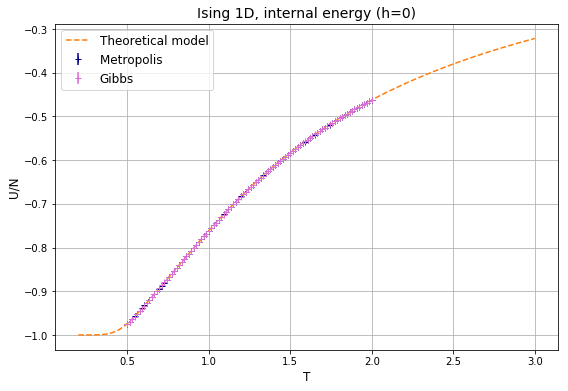

In [67]:
## Intenal energy per spin
points=100
T = np.linspace(0.2,3.0,num=points)
##theoretical model
beta = 1/T
J = 1.0
Ns = 50
th = np.tanh(J/T)
thN= th**Ns
ch = 1/th
e = -J*( th + ch*thN )/( 1 + thN )

##data
temp = np.loadtxt("./Outfiles/meas_metro_prova4_final_vals_ene.dat", usecols=1, max_rows=points)
ene = np.loadtxt("./Outfiles/meas_metro_prova4_final_vals_ene.dat", usecols=2, max_rows=points)
err = np.loadtxt("./Outfiles/meas_metro_prova4_final_vals_ene.dat", usecols=3, max_rows=points)
tempG = np.loadtxt("./Outfiles/meas_gibbs_prova5_final_vals_ene.dat", usecols=1, max_rows=points)
eneG = np.loadtxt("./Outfiles/meas_gibbs_prova5_final_vals_ene.dat", usecols=2, max_rows=points)
errG = np.loadtxt("./Outfiles/meas_gibbs_prova5_final_vals_ene.dat", usecols=3, max_rows=points)

##plot
plt.figure(figsize=(9,6))
plt.errorbar(temp, ene , err, fmt = "+", label = "Metropolis ", color="darkblue")
plt.errorbar(tempG, eneG, errG, fmt = "+", color="orchid" ,label = "Gibbs")
plt.plot(T, e,"--", label = "Theoretical model", color = "C1")
plt.title('Ising 1D, internal energy (h=0)', size=14)
plt.xlabel('T', size=12)
plt.ylabel('U/N', size=12)
plt.legend(loc = "upper left",fontsize=12)
plt.grid(True)
plt.show()

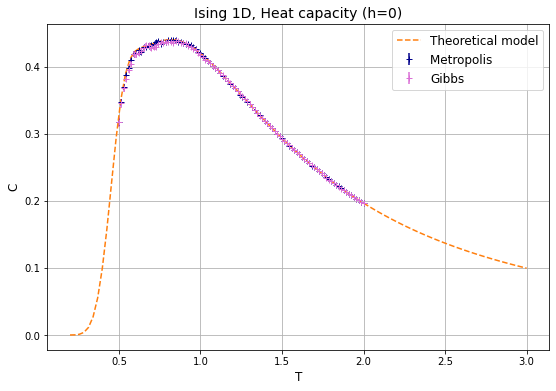

In [6]:
## Heat capacity per spin
points=100
T = np.linspace(0.2,3.0,num=points)
##theoretical model
beta = 1/T
J = 1.0
Ns = 50
th = np.tanh(J/T)
thN= th**Ns
ch = 1/th
heat=((beta*J)**2)*(((1+thN+(Ns-1)*(th**2)+(Ns-1)*(ch**2)*thN)/(1+thN))-Ns*((th+ch*thN)/(1+thN))**2)

##data
temp = np.loadtxt("./Outfiles/meas_metro_prova4_final_vals_heat.dat", usecols=1, max_rows=points)
heatM = np.loadtxt("./Outfiles/meas_metro_prova4_final_vals_heat.dat", usecols=2, max_rows=points)
err = np.loadtxt("./Outfiles/meas_metro_prova4_final_vals_heat.dat", usecols=3, max_rows=points)
tempG = np.loadtxt("./Outfiles/meas_gibbs_prova5_final_vals_heat.dat", usecols=1, max_rows=points)
heatG = np.loadtxt("./Outfiles/meas_gibbs_prova5_final_vals_heat.dat", usecols=2, max_rows=points)
errG = np.loadtxt("./Outfiles/meas_gibbs_prova5_final_vals_heat.dat", usecols=3, max_rows=points)

##plot
plt.figure(figsize=(9,6))
plt.errorbar(temp, heatM , err, fmt = "+", label = "Metropolis ", color="darkblue")
plt.errorbar(tempG, heatG, errG, fmt = "+", label = "Gibbs", color = "orchid")
plt.plot(T, heat ,"--", label = "Theoretical model", color="C1")
plt.title('Ising 1D, Heat capacity (h=0)', size=14)
plt.xlabel('T', size=12)
plt.ylabel('C', size=12)
plt.legend(loc = "upper right",fontsize=12)
plt.grid(True)
plt.show()

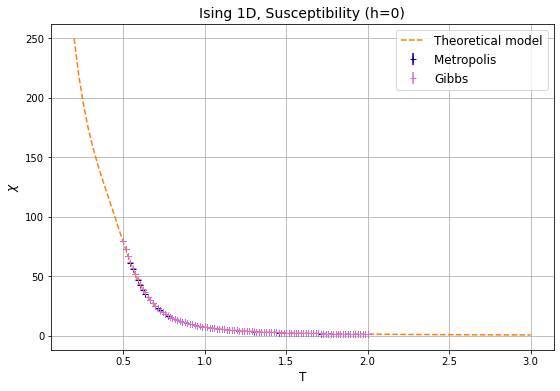

In [5]:
## Susceptibility per spin
points=100
T = np.linspace(0.2,3.0,num=points)
##theoretical model
beta = 1/T
J = 1.0
Ns = 50
th = np.tanh(J/T)
thN= th**Ns
ch = 1/th
X = beta*np.exp(2*beta*J)*(1-thN)/(1+thN)

##data
temp = np.loadtxt("./Outfiles/meas_metro_prova4_final_vals_chi.dat", usecols=1, max_rows=points)
chiM = np.loadtxt("./Outfiles/meas_metro_prova4_final_vals_chi.dat", usecols=2, max_rows=points)
err = np.loadtxt("./Outfiles/meas_metro_prova4_final_vals_chi.dat", usecols=3, max_rows=points)
tempG = np.loadtxt("./Outfiles/meas_gibbs_prova5_final_vals_chi.dat", usecols=1, max_rows=points)
chiG = np.loadtxt("./Outfiles/meas_gibbs_prova5_final_vals_chi.dat", usecols=2, max_rows=points)
errG = np.loadtxt("./Outfiles/meas_gibbs_prova5_final_vals_chi.dat", usecols=3, max_rows=points)

##plot
plt.figure(figsize=(9,6))
plt.errorbar(temp, chiM , err, fmt = "+", label = "Metropolis ",color="darkblue")
plt.errorbar(tempG, chiG, errG, fmt = "+", label = "Gibbs", color="orchid")
plt.plot(T, X ,"--", label = "Theoretical model", color="C1")
plt.title('Ising 1D, Susceptibility (h=0)', size=14)
plt.xlabel('T', size=12)
plt.ylabel('$\chi$ ', size=12)
plt.legend(loc = "upper right",fontsize=12)
plt.grid(True)
plt.show()

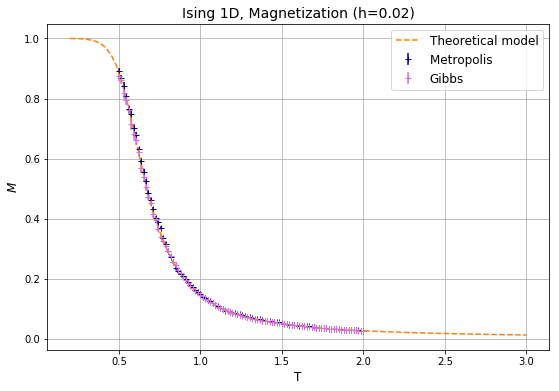

In [72]:
## Magnetization
points=100
T = np.linspace(0.2,3.0,num=points)
##theoretical model
J = 1.0
Ns = 50
th = np.tanh(J/T)
thN= th**Ns
ch = 1/th
h=0.02 #external field
b = 1/T
l1 = np.exp(b*J)*np.cosh(b*h)+np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
l2 = np.exp(b*J)*np.cosh(b*h)-np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
Z = l1**Ns + l2**Ns
M = (np.exp(b*J)*np.sinh(b*h)*((l1**(Ns-1))*(1+np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))) 
        + (l2**(Ns-1))*(1-np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J)))))/(Z)

##data
tempM = np.loadtxt("./Outfiles/meas_metro_prova7_final_vals_mag.dat", usecols=1, max_rows=points)
magM = np.loadtxt("./Outfiles/meas_metro_prova7_final_vals_mag.dat", usecols=2, max_rows=points)
errM = np.loadtxt("./Outfiles/meas_metro_prova7_final_vals_mag.dat", usecols=3, max_rows=points)
tempG = np.loadtxt("./Outfiles/meas_gibbs_prova6_final_vals_mag.dat", usecols=1, max_rows=points)
magG = np.loadtxt("./Outfiles/meas_gibbs_prova6_final_vals_mag.dat", usecols=2, max_rows=points)
errG = np.loadtxt("./Outfiles/meas_gibbs_prova6_final_vals_mag.dat", usecols=3, max_rows=points)

##plot
plt.figure(figsize=(9,6))
plt.errorbar(tempM, magM , errM, fmt = "+", label = "Metropolis ",color="darkblue")
plt.errorbar(tempG, magG, errG, fmt = "+", label = "Gibbs", color="orchid")
plt.plot(T, M ,"--", label = "Theoretical model", color="C1")
plt.title('Ising 1D, Magnetization (h=0.02)', size=14)
plt.xlabel('T', size=12)
plt.ylabel('$M$', size=12)
plt.legend(loc = "upper right",fontsize=12)
plt.grid(True)
plt.show()

In [ ]:
##############################################################################################

##### Run this cell to quickly run the simulation:

In [71]:
### temperature in [0.5 , 2] -> 1 final value for each temperature
import os
## 
i=0
points = 100
temps = np.linspace(0.5, 2.0, points)

for t in temps:
    ### prima tutto tranne la magnetizzazione
    in_file = open("input.dat", "r")
    list_of_lines = in_file.readlines()
    list_of_lines[0] = str(t) + "\n"  ##temperature
    list_of_lines[1] = "50\n" ##n spins
    list_of_lines[2] = "1.0\n" ## J
    list_of_lines[3] = "0.02\n" ##h
    list_of_lines[4] = "1\n" ## 1=metropolis 0=gibbs
    list_of_lines[5] = "50\n" #nblk
    list_of_lines[6] = "10000\n" #n steps per block
    list_of_lines[7] = "0\n"  ## start
    list_of_lines[8] = "1\n" ##equi
    list_of_lines[9] = "prova7\n"  ##filename
    list_of_lines[10] = "\n"  
    list_of_lines[11] = "\n"  
    list_of_lines[12] = "\n"  
    list_of_lines[13] = "\n" 
    in_file.close()

    out_file = open("input.dat", "w")
    out_file.writelines(list_of_lines)
    out_file.close()
    
    os.system("./Monte_Carlo_ISING_1D_new.exe")
    if((i%10) == 0 ):
        print("temp:" , t , "-> Done")
    
    i += 1

temp: 0.5 -> Done
temp: 0.6515151515151515 -> Done
temp: 0.803030303030303 -> Done
temp: 0.9545454545454546 -> Done
temp: 1.106060606060606 -> Done
temp: 1.2575757575757576 -> Done
temp: 1.4090909090909092 -> Done
temp: 1.5606060606060606 -> Done
temp: 1.7121212121212122 -> Done
temp: 1.8636363636363638 -> Done
